# Infinite double well for large time increment

To understand what is going on with the distributions when the time increment gets large, I look at a linearise version of the SDE of interest. The SDE of interest is: 
 $$
    dX_j = \left( -2X_j + \frac{1}{X_j^3} \right) dt + \sqrt{2 \tau} dB_j.
$$
The deterministic part of the SDE is not linear, solving it is therefore quiet difficult. Alternatively, one can use a Taylor expansion of the deterministic part of the SDE and use this to obtain linearise SDE. Let's start by stating that : $f(X_j)=\left( -2X_j + \frac{1}{X_j^3} \right)$, such that $f(X_j^*)=0$. The roots are: $X_j^* = \pm \frac{1}{2^{1/4}}$. Focusing on the positive roots, we have that: 
$$
\begin{equation}
\begin{aligned}
f(X_j) &= f(X_j^*)+ f'(X_j^*)(X_j-X_j^*)+ O(X_j^2) \\
f(X_j) &= -\frac{7}{2}+7*2^{-\frac{5}{2}}
\end{aligned}
\end{equation}
$$

The linearised SDE is therefore of the form: 
$$
\begin{equation}
\begin{aligned}
dX_j = \left( aX_j + b\right) dt + \sqrt{2 \tau} dB_j,
\end{aligned}
\end{equation}
$$
where $a=-\frac{7}{2}$ and $b=7*2^{-5/2}$. 

Using the ito formula on the function $Y_t = \exp(-a t)X_j$, we are able to obtain a solution to the linearise SDE. Leaving the details for later, the solution is: 
$$
\begin{equation}
\begin{aligned}
X(t) = X(0)\exp(at)+ \int_0^t b \exp(-a(s-t)) ds + \int_0^t 2 \tau \exp(-a(s-t))dB(s)
\end{aligned}
\end{equation}
$$
with $a=-\frac{7}{2}$ and $b=7*2^{-5/2}$. 

Need to do the stability property analysis. 

Looking at the associated ODE as the linearised SDE has an additive part for stability property. Applying the $\theta$-method to generalise the method, we have: 
$$
X_{n+1}-X_{n} = (aX_n+b) \Delta t \theta + (a X_n+b) \Delta t (1-\theta)
$$

The Euler Maruyama scheme is such that $\theta=1$, therefore we have: 
$$
\begin{equation}
\begin{aligned}
X_{n+1}-X_{n} = (aX_n+b) \Delta t \theta \\
\Leftrightarrow X_{n+1}=(a \Delta t + 1)X_n + b \Delta t
\end{aligned}
\end{equation}
$$

By reccurence, we obtain: 
$$
\begin{equation}
\begin{aligned}
X_{n+i}= (a \Delta t+1)^i X_n + \sum_{j=1}^{i} \left( (a \Delta t+1)(b \Delta t)\right) ^{j-1}
\end{aligned}
\end{equation}
$$

The condition for convergence on $\Delta t$ is that: 
$$
\begin{equation}
\begin{aligned}
\Delta t>0 \text{ and } \Delta t < \frac{-2}{a}
\end{aligned}
\end{equation}
$$

In this linearise related ODE, this means that: 

$$
\begin{equation}
\begin{aligned}
\Delta t>0 \text{ and } \Delta t < \frac{4}{7}\approx 0.57
\end{aligned}
\end{equation}
$$

I doubt this explains exactly everything that happens in the related SDE above, as even for value of $\Delta t=0.5$, the convergence is not obtained yet. 

In [26]:
%run numba_code/infinitedoublewell.py
%run numba_code/infinitedoublewell_linearised.py

<Figure size 432x288 with 0 Axes>

In [27]:
import numpy as np
import matplotlib
matplotlib.rcParams['text.usetex'] = True
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.integrate as integrate

## ---------------- Mathplotlib settings ----------------
SMALL_SIZE = 12
MEDIUM_SIZE = 18
BIGGER_SIZE = 25

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [28]:
## Exact solutions
N=10**7
tau=0.01
dt_list=[0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1,10**(-2)]

# empty vector to save results
y_res_lin = []
for i in range(len(dt_list)):
    dti=dt_list[i]
    y_exact = DW_sde_fast_lin(N,dti,tau)
    y_res_lin.append(y_exact)

In [20]:
## Linearised solutions
N=10**7
tau=0.01
dt_list=[0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1,10**(-2)]

# empty vector to save results
y_res_lin = []
for i in range(len(dt_list)):
    dti=dt_list[i]
    y_exact = DW_sde_fast_lin(N,dti,tau)
    y_res_lin.append(y_exact)

/home/s2133976/.local/lib/python3.8/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


(0.0, 0.45)

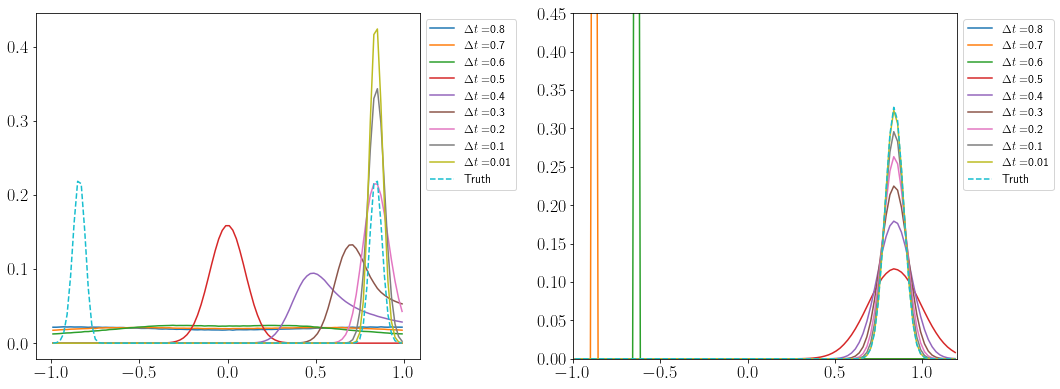

In [35]:
# axis of the plot 
fig, (ax1,ax2)= plt.subplots(1, 2,figsize=(16,6))# plt.figure(figsize=(4,4))
fig.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)


## Plot 1 
for i in range(len(dt_list)):
    ye = y_res[i]
    dti = dt_list[i]
    histogram,bins = np.histogram(ye,bins=100,range=[-1,1], density=True)
    midx = (bins[0:-1]+bins[1:])/2
    histogram=(histogram/np.sum(histogram))*2
    ax1.plot(midx,histogram,label='$\Delta t=$'+str(dti))
    
midx = (bins[0:-1]+bins[1:])/2
rho = np.exp(- (U(midx)/tau))
rho = rho / ( np.sum(rho) * (midx[1]-midx[0]) ) 
rho=(rho/np.sum(rho))*2
ax1.plot(midx,rho,'--',label='Truth')      
ax1.legend(loc='upper left', bbox_to_anchor=(1, 1)) #add the legend

# Plot 2 
for i in range(len(dt_list)):
    ye = y_res_lin[i]
    dti = dt_list[i]
    histogram,bins = np.histogram(ye,bins=100,range=[-1,1.2], density=True)
    midx = (bins[0:-1]+bins[1:])/2
    histogram=(histogram/np.sum(histogram))*2
    ax2.plot(midx,histogram,label='$\Delta t=$'+str(dti))
    
def v(x):
    a=-7/2
    b=7*np.power(2,-5/4)
    return a*x*x/2+b*x

midx = (bins[0:-1]+bins[1:])/2
rho = np.exp( (v(midx)/tau))
rho = rho / ( np.sum(rho) * (midx[1]-midx[0]) ) 
rho=(rho/np.sum(rho))*2
ax2.plot(midx,rho,'--',label='Truth')      
ax2.legend(loc='upper left', bbox_to_anchor=(1, 1)) #add the legend
ax2.set_xlim(-1,1.2)
ax2.set_ylim(0,0.45)

